In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\gg52830\Desktop\Scripts\python\JupyterNotebook\Datasets\Titanic\train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df1 = pd.read_csv(r"C:\Users\gg52830\Desktop\Scripts\python\JupyterNotebook\Datasets\Titanic\test.csv")

In [7]:
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
df1.shape

(418, 11)

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

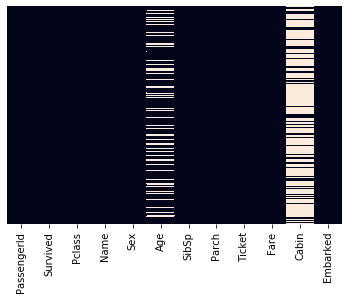

In [10]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])

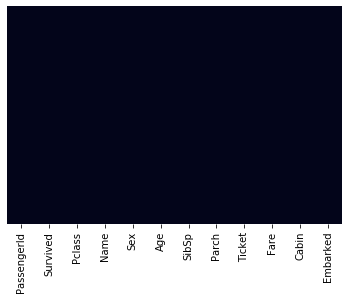

In [13]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

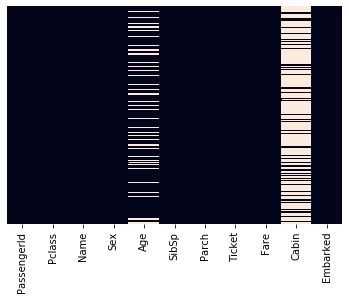

In [14]:
sns.heatmap(df1.isnull(), yticklabels=False, cbar=False)

In [15]:
df = df.drop(['PassengerId'], axis=1)
df1 = df1.drop(['PassengerId'], axis=1)
df = df.drop(['Name'], axis=1)
df1 = df1.drop(['Name'], axis=1)

In [16]:
df['Age'] = df['Age'].fillna(df1['Age'].mean())
df1['Age'] = df1['Age'].fillna(df1['Age'].mean())
df1['Cabin'] = df1['Cabin'].fillna(df1['Cabin'].mode()[0])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df1['Embarked'] = df1['Embarked'].fillna(df1['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df1['Fare'] = df1['Fare'].fillna(df1['Fare'].mean())

In [17]:
df = df.drop(['Ticket'], axis=1)
df1 = df1.drop(['Ticket'], axis=1)

In [18]:
df1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,B57 B59 B63 B66,Q
1,3,female,47.0,1,0,7.0000,B57 B59 B63 B66,S
2,2,male,62.0,0,0,9.6875,B57 B59 B63 B66,Q
3,3,male,27.0,0,0,8.6625,B57 B59 B63 B66,S
4,3,female,22.0,1,1,12.2875,B57 B59 B63 B66,S


In [19]:
df.shape

(891, 9)

In [20]:
df1.shape
df.dropna(inplace=True)
df.shape

(891, 9)

In [21]:
nan_rows = df1[df1.isnull().any(1)]
nan_rows

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked


In [22]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [23]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Embarked,0,0.0
Cabin,0,0.0
Fare,0,0.0
Parch,0,0.0
SibSp,0,0.0


In [24]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,B96 B98,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,B96 B98,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,B96 B98,S


In [25]:
replace_map = {'S': 0, 'C': 1, 'Q': 2}
df['Embarked'].replace(replace_map, inplace=True)
df1['Embarked'].replace(replace_map, inplace=True)

In [26]:
replace_map = {'male': 0, 'female': 1}
df['Sex'].replace(replace_map, inplace=True)
df1['Sex'].replace(replace_map, inplace=True)

In [27]:
df = df.drop(['Cabin'], axis=1)
df1 = df1.drop(['Cabin'], axis=1)

In [28]:
df1['Embarked'].value_counts()

0    270
1    102
2     46
Name: Embarked, dtype: int64

In [29]:
df.dropna(inplace=True)
df.shape

(891, 8)

In [30]:
x_train = df.drop(['Survived'], axis=1)
y_train = df['Survived']

In [31]:
x_test = df1
print(x_train.head())
print(x_test.head())
print(x_train.info())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  22.0      1      0   7.2500         0
1       1    1  38.0      1      0  71.2833         1
2       3    1  26.0      0      0   7.9250         0
3       1    1  35.0      1      0  53.1000         0
4       3    0  35.0      0      0   8.0500         0
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  34.5      0      0   7.8292         2
1       3    1  47.0      1      0   7.0000         0
2       2    0  62.0      0      0   9.6875         2
3       3    0  27.0      0      0   8.6625         0
4       3    1  22.0      1      1  12.2875         0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch    

In [32]:
random_forest = RandomForestClassifier(n_estimators=700)
random_forest.fit(x_train, y_train)

y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train)*100,2)
acc_random_forest

98.2

In [33]:
regression = LogisticRegression()
regression.fit(x_train, y_train)

y_pred = regression.predict(x_test)
regression.score(x_train, y_train)
acc_reg = round(regression.score(x_train, y_train)*100,2)
acc_reg

80.47

In [34]:
dec = DecisionTreeClassifier()
dec.fit(x_train, y_train)
y_pred = dec.predict(x_test)

dec.score(x_train, y_train)

0.9820426487093153

In [35]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)
neigh.score(x_train, y_train)

0.8316498316498316

In [36]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)

print(gaussian.score(x_train, y_train))

gaussian = GaussianNB()
gaussian.partial_fit(x_train, y_train, np.unique(y_train))
y_pred = gaussian.predict(x_test)

print(gaussian.score(x_train, y_train))

0.7934904601571269
0.7934904601571269


In [37]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 55.7 KB


In [38]:
#create a submission file and submit
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv(r"C:\Users\gg52830\Desktop\Scripts\python\JupyterNotebook\Datasets\Titanic\gender_submission.csv")
datasets = pd.concat([sub_df['PassengerId'], pred], axis=1)
datasets.columns=['PassengerId', 'Survived']
datasets.to_csv(r"C:\Users\gg52830\Desktop\Scripts\python\JupyterNotebook\Datasets\Titanic\gender_submission.csv", index=False)